# Лабораторная работа 1
# Персептроны. Процедура обучения Розенблатта

### Воронов К.М., М8О-407Б-19

### Цель работы: исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

Вариант 19

In [1]:
import keras
import tensorflow as tf
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import pylab

In [2]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
xy = np.array([[1.9, 0.8], [3.1, 3.7], [4.8, -5], [3.6, 1.1], [4.8, 0.2], [-0.3, 3]])
labels = np.array([1, 1, 0 ,0 , 0, 1])

In [4]:
def draw2cl(xy, drawgr, model_weights = 0, end = 0, start = 0):
    fig, ax = pylab.subplots(1, 1)
    colors = ['r' if l > 0 else 'b' for l in labels]
    ax.scatter(xy[:, 0], xy[:, 1], marker = 'o', c = colors, s = 50, alpha = 0.8)

    if drawgr:
        y1 = (-model_weights[1][0] - model_weights[0][0][0] * start) / model_weights[0][1][0]
        y2 = (-model_weights[1][0] - model_weights[0][0][0] * end) / model_weights[0][1][0]
        plt.axline((start,  y1), (end, y2), c = 'g')

    fig.show()

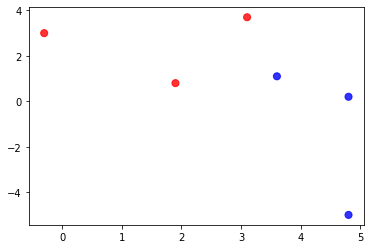

In [5]:
draw2cl(xy, False)

Epoch 1/10
6/6 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 0.1213 - accuracy: 0.8333
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.1082 - accuracy: 0.8333
Epoch 4/10
6/6 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.8333
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.8333
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.8333
Epoch 7/10
6/6 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.8333
Epoch 8/10
6/6 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 1.0000


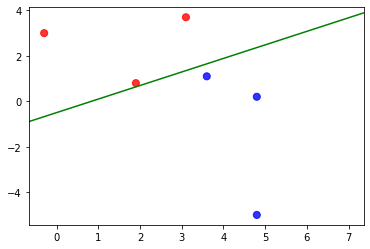

In [6]:
model = keras.models.Sequential()

model.add(Dense(1,  input_dim = 2,  activation = "sigmoid",  kernel_initializer = keras.initializers.RandomNormal(stddev=0.01), bias_initializer = keras.initializers.Zeros()))
model.compile(tf.keras.optimizers.Adam(0.3), 'mse', ['accuracy'])

model.fit(xy, labels, batch_size = 1, epochs = 10)

draw2cl(xy, True, model.get_weights(), 7)

Epoch 1/10
6/6 [==============================] - 0s 3ms/step - loss: 0.9509 - accuracy: 0.3333
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8333
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.1415 - accuracy: 0.8333
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.1233 - accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 2ms/step - loss: 0.1059 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 1.0000


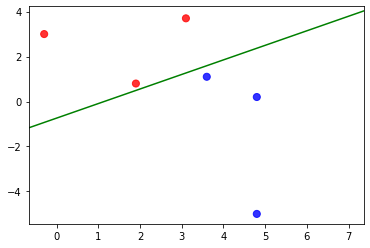

In [7]:
model = keras.models.Sequential()

model.add(Dense(1,  input_dim = 2,  activation = "sigmoid",  kernel_initializer = keras.initializers.RandomNormal(stddev=0.01), bias_initializer = keras.initializers.Zeros()))
model.compile(tf.keras.optimizers.Adam(0.5), 'binary_crossentropy', ['accuracy'])

model.fit(xy, labels, batch_size = 1, epochs = 10)

draw2cl(xy, True, model.get_weights(), 7)

In [8]:
xy = np.array([[-4, 1.5], [-0.1, 2.7],[2.1, 4], [3.9, -1.7], [1.9, -3.1], [-4.7, 2.4], [0, -0.3], [4, 1]])
labels = np.array([[0, 0], [0, 1], [0, 1], [1, 1], [1, 1], [0, 0], [0, 1], [1, 1]])

In [9]:
def draw4cl(xy, drawgr, model_weights = 0, end1 = 0, start1 = 0, end2 = 0, start2 = 0):
    fig, ax = pylab.subplots(1, 1)
    colors = [0] * len(labels)

    for i, l in enumerate(labels):
        h = l[0] + 2 * l[1]
        if h == 0:
            colors[i] = 'r'
        if h == 1:
            colors[i] = 'b'
        if h == 2:
            colors[i] = 'y'
        if h == 3:
            colors[i] = 'm'

    ax.scatter(xy[:, 0], xy[:, 1], marker = 'o', c = colors, s = 50, alpha = 0.8)

    if drawgr:
        y1 = (-model_weights[1][0] - model_weights[0][0][0] * start1) / model_weights[0][1][0]
        y2 = (-model_weights[1][0] - model_weights[0][0][0] * end1) / model_weights[0][1][0]
        y3 = (-model_weights[1][0] - model_weights[0][0][1] * start2) / model_weights[0][1][1]
        y4 = (-model_weights[1][1] - model_weights[0][0][1] * end2) / model_weights[0][1][1]
        plt.axline((start1,  y1), (end1, y2), c = 'g')
        plt.axline((start2,  y3), (end2, y4), c = 'g')

    fig.show()

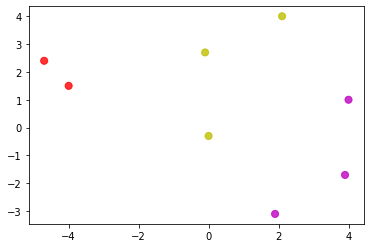

In [10]:
draw4cl(xy, False)

In [11]:
def myaccuracy(labels, pred):
    pred = tf.round(pred)
    correct = 0
    
    for i in range(len(labels)):
        if (tf.equal(tf.cast(pred[i][0], tf.int32), tf.cast(labels[i][0], tf.int32)) and tf.equal(tf.cast(pred[i][1], tf.int32), tf.cast(labels[i][1], tf.int32))):
           correct += 1

    return correct / len(labels)

Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 0.2047 - myaccuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0304 - myaccuracy: 0.8750
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 6.1644e-04 - myaccuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 4.4779e-04 - myaccuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 3.3500e-04 - myaccuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 2.2948e-04 - myaccuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 1.6445e-04 - myaccuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 1.4993e-04 - myaccuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 1.3867e-04 - myaccuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 1.2705e-04 - myaccu

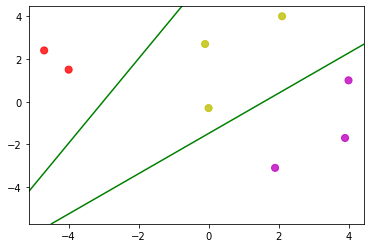

In [22]:
model = keras.models.Sequential()

model.add(Dense(2,  input_dim = 2,  activation = "sigmoid",  kernel_initializer=keras.initializers.RandomNormal(stddev = 0.01), bias_initializer = keras.initializers.Zeros()))
model.compile(tf.keras.optimizers.Adam(0.5), 'mse', [myaccuracy])

model.fit(xy, labels, batch_size = 1, epochs = 10)

draw4cl(xy, True, model.get_weights(), 4, -4, -2, -1)

# Выводы
Выполнив данную лабораторную работу, я вспомнил устройство и принцип работы персептрона, основы программирования с использованием tenserflow, а также обучил нейросети классифицировать точки. 